## Introduction
<p><img src="https://assets.datacamp.com/production/project_1174/img/trendlines.jpg" alt="Image of two trendlines over time."></p>
<p>It’s important to stay informed about trends in programming languages and technologies. Knowing what languages are growing or shrinking can help you decide where to invest. </p>
<p>An excellent source to gain a better understanding of popular technologies is <a href="https://stackoverflow.com/">Stack Overflow</a>. Stack overflow is an online question-and-answer site for coding topics. By looking at the number of questions about each technology, you can get an idea of how many people are using it.</p>
<p>You'll be working with a dataset with one observation for each tag in each year. The dataset was downloaded from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a>. Below you can find an overview of the data that is available to you:<br><br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/stack_overflow_data.csv</b></div>
<ul>
    <li><b>year:</b> The year the question was asked.</li>
    <li><b>tag:</b> A word or phrase that describes the topic of the question.</li>
    <li><b>number:</b> The number of questions with a certain tag in that year.</li>
    <li><b>year_total:</b> The total number of questions asked in that year.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/41">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around data manipulation and visualization in the Tidyverse and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/introduction-to-the-tidyverse">Introduction to the Tidyverse</a>.</em></p>

In [22]:
# Use this cell to begin your analysis, and add as many as you would like!
# Load libraries
library(readr)
library(dplyr)
library(ggplot2)

# Read stack_overflow_data.csv
by_tag_year <- read_csv("datasets/stack_overflow_data.csv")

# Structure of dataset
head(by_tag_year)

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


year,tag,number,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541


In [24]:
# Q1: What Fraction of the total number of questions asked in 2019 had the R tag?

# Mutate percentage column for tags
by_tag_year_fraction <- by_year_tag %>%
    mutate(percentage = (number / year_total)* 100)

# Filter how many questions in 2019 had the r tag
r_tag_2019 <- by_tag_year_fraction %>%
    filter(year == "2019", tag == "r")

head(by_tag_year_fraction)
head(r_tag_2019)

year,tag,number,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2008,treeview,69,168541,0.0409395933
2008,scheduled-tasks,30,168541,0.0177998232
2008,specifications,21,168541,0.0124598762
2008,rendering,35,168541,0.0207664604
2008,http-post,6,168541,0.0035599646
2008,static-assert,1,168541,0.0005933274


year,tag,number,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019,r,52249,5410632,0.9656728


In [25]:
# A1: 0.9% of total questions asked in 2019 had the R tag

r_percentage <- r_tag_2019 %>%
    select(percentage)

r_percentage

percentage
<dbl>
0.9656728


In [28]:
# Q2: What were the five most asked-about tags in the last 5 years 2015 - 2020?

# Filter, group, summarize and arrange identifying most asked tags
sorted_tags <- by_tag_year %>%
    filter(year %in% (2015:2020)) %>%
    group_by(tag) %>%
    summarize(tag_total = sum(number)) %>%
    arrange(desc(tag_total))

head(sorted_tags)

tag,tag_total
<chr>,<dbl>
javascript,1373634
python,1187838
java,982747
android,737330
c#,730045


In [44]:
# A2: The five most asked-about tags between 2015 - 2020

highest_tags <- head(sorted_tags$tag, n = 5)

highest_tags

[1] "javascript" "python"     "java"       "android"    "c#"

In [49]:
# Bonus: Visualization of the fraction of questions about the five most asked about tags has changed from 2015 - 2020

top_sorted_tags_fraction <- by_tag_year_fraction %>%
    filter(tag %in% highest_tags, year %in% 2015:2020)

top_sorted_tags_fraction

year,tag,number,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015,android,163793,6612772,2.476919
2015,python,137353,6612772,2.077087
2015,javascript,256039,6612772,3.871886
2015,java,215652,6612772,3.261144
2015,c#,155054,6612772,2.344766
2016,android,159838,6593600,2.424139
2016,python,158624,6593600,2.405727
2016,javascript,264379,6593600,4.009631
2016,java,197038,6593600,2.988322


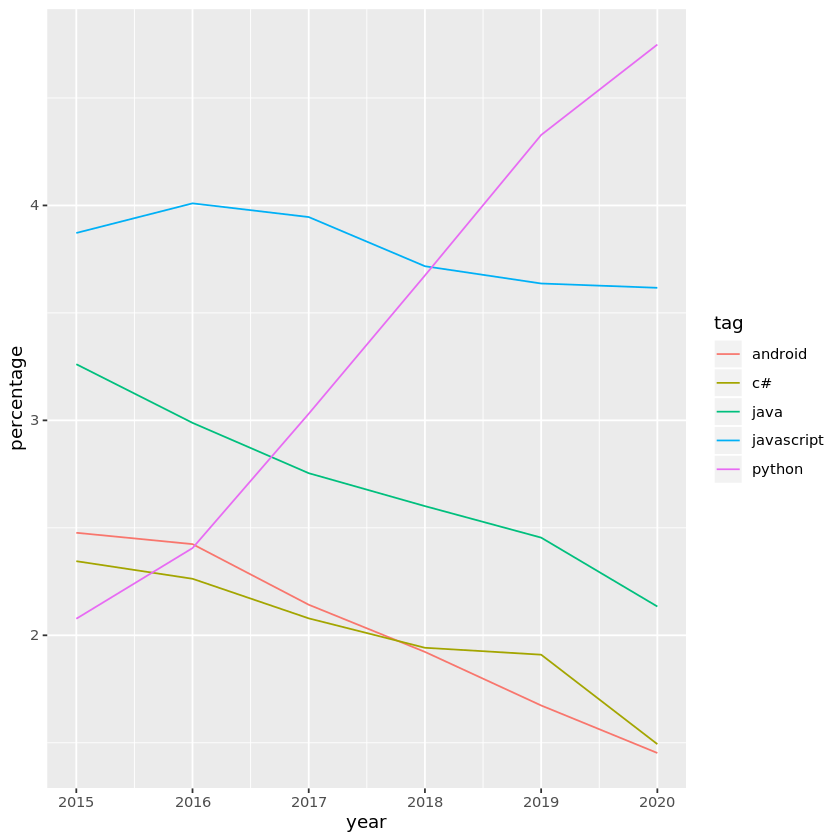

In [51]:
# Line plot using color to represent tags

top_sorted_tags_fraction %>%
    ggplot(aes(year, percentage, color = tag))+
    geom_line()